## Problem Statement

Hi Everyone, The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. So now your aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

Although we are attaching the required documents in the attached zip folder but You can also use the below mentioned link and register here to access the problem statement and dataset: 

* https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

The submission file generated by this code is attached in the same folder, Please use the solution checker tab to upload the submission file, the public score would be generated immediately.

## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Building Model__

### Step 1: Importing the Relevant Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data reading

In [3]:
train = pd.read_csv("train_v9rqX0R.csv")
test = pd.read_csv("test_AbJTz2l.csv")

In [4]:
train.shape,test.shape

((8523, 12), (5681, 11))

* __We have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns.__

In [5]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [6]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

* __We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.__

In [7]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


In [8]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 4


### Step 3: Data Cleaning

Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [9]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

* Item_Weight and Outlet_Size have some missing values in the data

__3.1 Item Weight__

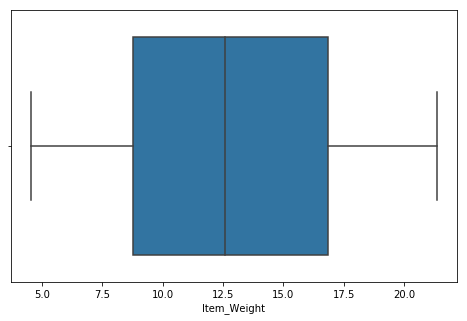

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=train)

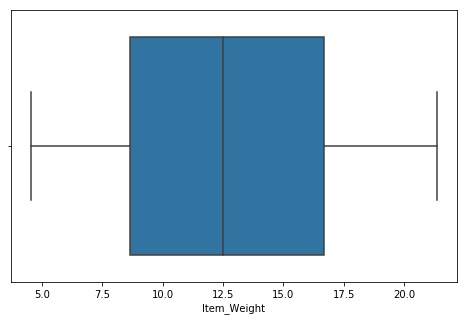

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=test)

__The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"__

In [11]:
# Imputing with Mean
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [12]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

We have succesfully imputed the missing values from the column Item_Weight

__3.2 : Outlet Size__

In [13]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [15]:
print(train['Outlet_Size'].value_counts())
print('******************************************')
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
******************************************
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


__Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column__

In [16]:
#Imputing with Mode
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [17]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

__We have succesfully imputed the missing values from the column Outlet_Size.__

### Step 4: Exploratory Data Analysis

In [18]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [19]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

__We see there are some irregularities in the column and it is needed to fix them.__

In [23]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [24]:
train['Item_Fat_Content']= train['Item_Fat_Content'].astype(str)

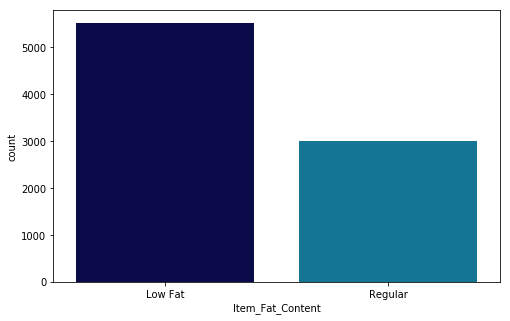

In [25]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train,palette='ocean')

__The Items bought are more of Low Fat.__

In [28]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [29]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [30]:
train['Item_Type'].nunique()

16

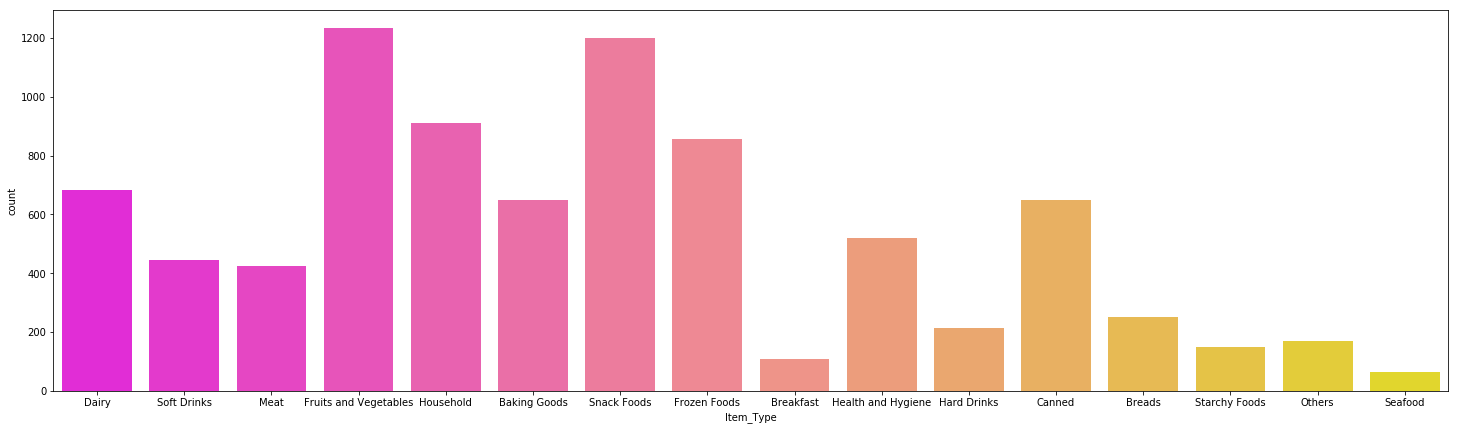

In [31]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=train,palette='spring')

* __Fruits and Vegetables are largely sold as people tend to use them on daily purpose.__
* __Snack Foods too have good sales.__
* __Households too have good sales.__

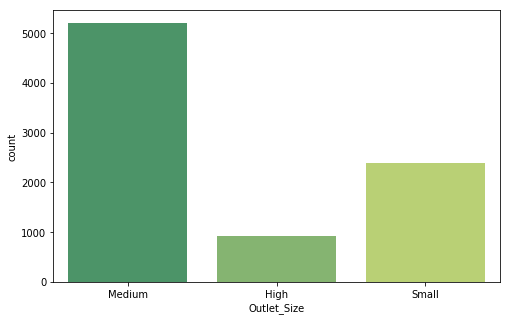

In [35]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=train,palette='summer')

* __The Outlets are more of Medium Size__

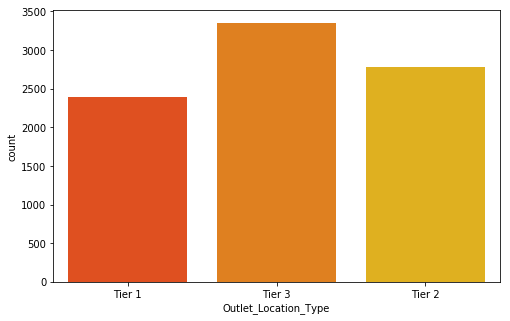

In [36]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train,palette='autumn')

* __The Outlets are maximum in number in Tier 3 Cities__

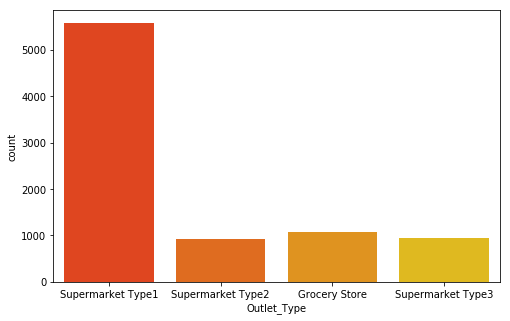

In [37]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train,palette='autumn')

* __The Outlets are more of Supermarket Type1__

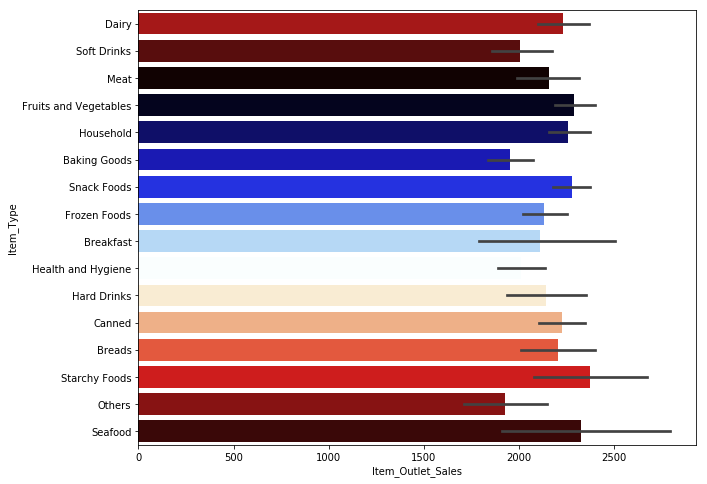

In [38]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='flag')

* __The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.__

### Step 5: Building Model

In [39]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

* __Encoding the required columns from training and test dataset__

In [41]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [45]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [46]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [47]:
# Seperate Features and Target
X= train.drop(columns = ['Item_Outlet_Sales'], axis=1)
y= train['Item_Outlet_Sales']

In [48]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [49]:
# Model Building
features= X.columns
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_valid)
coef = pd.Series(LR.coef_,features).sort_values()


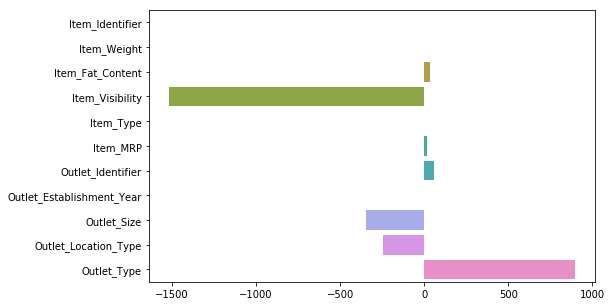

In [50]:
# Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

* __Item Visibility, Outlet_Type, Outlet_Size, Outlet_Location_Type are the most important attributes to determine Item_Outlet_Sales.__

__RMSE__

In [51]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1246.1717725051317


* __Validation Set RMSE score is around 1246 from this linear model__

In [37]:
submission = pd.read_csv('sample_submission.csv')
final_predictions = LR.predict(test)
submission['Item_Outlet_Sales'] = final_predictions
#only positive predictions for the target variable
submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)

Done